# Analysis of GJ776 Spectra

## Cleaning and Plotting data

In this step, we will plot all available data for the Star and also look at the Lomb Scargle Periodogram to identfy possible RV signals due to planets, companions stars or mag activity. Before this is done the blaze function is fitted to the original blaze uncorrected spectra. Please check if the provided targetname and spectra directory are correct.

In [1]:
star_name = 'GJ776'
directory_name = '/home/aaron/Desktop/ZASPE/Spectra/GJ776'

## Calculate wavelength calibration from Polynomials

In [2]:
     
from funcs import collect_fits_files, separate_fits_files
    
fits_files = collect_fits_files(directory_name,extension="A.fits")
fits_files, ccf_files = separate_fits_files(fits_files)
    
from funcs import calculate_wavelengths 

wavelengths = calculate_wavelengths(fits_files, directory_name)
observed_wavelengths = wavelengths     
    

Shape of wavelengths array: (200, 72, 4096)


### Apply the blaze correction by fitting a Polynomial to Blaze Uncorrected Spectra

In [3]:
   
from funcs import apply_blaze_correction

discarded_nights = apply_blaze_correction(observed_wavelengths,fits_files,ccf_files,directory_name)

  0%|          | 0/200 [00:00<?, ?it/s]

In [4]:

#remove nights to be discarded
import numpy as np
if len(discarded_nights) != 0:
    wavelenghts = np.delete(wavelengths,discarded_nights,axis = 0)
    fits_files = [fits_file for i, fits_file in enumerate(fits_files) if i not in discarded_nights]
    ccf_files = [ccf_file for i, ccf_file in enumerate(ccf_files) if i not in discarded_nights]  
    
    
#collect all fits files in the given directory
fits_files = collect_fits_files(directory_name, extension = 'blaze_correction.fits')
    

### Plot the blaze corrected spectra

The the step takes long due to extensive plotting. The .png files are stored in Plots/star_name_observer_night.png. The star name is obtained from simbad. Default is Gliese catalog, if not available it will use Henry Draper and otherwise Tess Input. \ You do not have to run the next 2 cells as it takes long. However, if you are interested in how the spectra look, you might want to take a peak.

In [ ]:

from funcs import plot_arrays, query_tic_name,query_gliese_name,query_HD_name, extract_target_info, extract_target_info_astropy
import matplotlib.pyplot as plt
from astropy.io import fits 
from tqdm.notebook import tqdm
from time import sleep
import re

for i in tqdm(range(len(fits_files))): 
    spectrum = fits.getdata(fits_files[i])
    flux = spectrum[3,:] #CERES pipeline blaze corrected flux
    wavelength = spectrum[0,:]
    string = fits_files[i] 
    cut_string = string.split("/")[-1][:38] + ".png"
    
    target_name, observed_night = extract_target_info_astropy(fits_files[i])
    t1 = target_name 
    if target_name.startswith("GJ") == False:
        target_name = query_gliese_name(target_name)    #try to get gliese id
    if target_name == "Unknown":
        target_name = query_HD_name(t1)   #try to get HD id
    if target_name == "Unknown":
        target_name = query_tic_name(t1) # try to get TIC id
      
      
    #make sure there is no whitespaces in the target_name
    pattern = re.compile(r'\s+')
    target_name = re.sub(pattern, '', target_name)
    
    file_name = target_name + observed_night + ".png"
    save_dir = "Plots/" + target_name
    
    plot_arrays(flux,wavelength,save_dir=save_dir, save_filename=file_name)
    
    sleep(3)

In [ ]:

#example plot
#add the file you intend to show
example_file = save_dir + "/" + file_name
from IPython.display import display, Image
display(Image(filename=example_file))

### RV Analyis

In [5]:

from funcs import get_RV_BJD
#obtain RV, RV uncertainty and BJD from the CCFs 
rv, rv_err, bjd = get_RV_BJD(ccf_files)

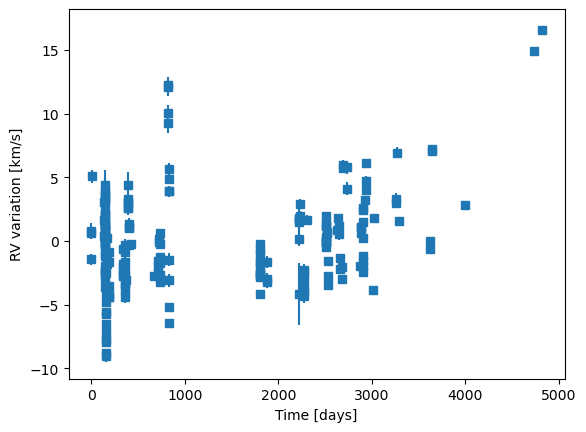

In [6]:

#plotting the RV variation
from funcs import plot_rvs

save_dir = 'Plots/' + star_name 
file_name = star_name + "_RV_variation.png"
plot_rvs(rv,rv_err/1000, bjd,save_dir, file_name) 

<IPython.core.display.Javascript object>


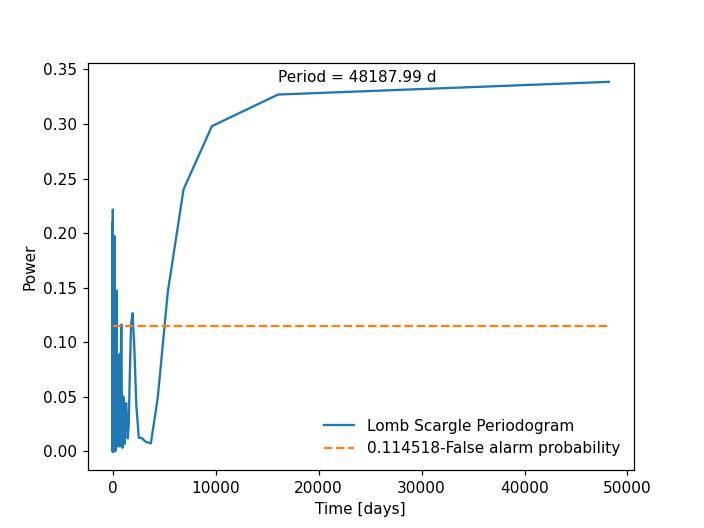

In [8]:
%matplotlib notebook 
#plotting the LS Periodogram
from funcs import plot_lomb_scargle

file_name = star_name + "_Lomb_Scargle.png"
plot_lomb_scargle(bjd, rv, rv_err/1000, save_dir= save_dir, save_filename=file_name)

Comments: Number of known planets 2. Present peaks in LS. At 175 days. An between 0-50 days. At 14 and 33 days. Some other unexplained peaks though? Maybe literature search on that one. 

## Combine and Align Spectra

In this step, we will combine and align all available spectra in the same time frame while removing artifacts that we dont want to have in the combined spectra, like saturation or cosmic rays. We will use two methods to combine the spectra - RV - correction method and Cross-Correlation Method.

### RV correction method

The RV correction is performed using the measured RVs by Harps. The wavelengths are then corrected for RV shift due to different time frames and moved to the first obervation night.

Night 23 in Order 0 has been discarded due to non-contributing flux.
Night 26 in Order 0 has been discarded due to non-contributing flux.
Night 29 in Order 0 has been discarded due to non-contributing flux.
Night 35 in Order 0 has been discarded due to non-contributing flux.
Night 36 in Order 0 has been discarded due to non-contributing flux.
Night 37 in Order 0 has been discarded due to non-contributing flux.
Night 39 in Order 0 has been discarded due to non-contributing flux.
Night 86 in Order 0 has been discarded due to non-contributing flux.
Night 129 in Order 0 has been discarded due to non-contributing flux.
Night 130 in Order 0 has been discarded due to non-contributing flux.
Night 156 in Order 0 has been discarded due to non-contributing flux.
Night 7 in Order 1 has been discarded due to non-contributing flux.
Night 8 in Order 1 has been discarded due to non-contributing flux.
Night 11 in Order 1 has been discarded due to non-contributing flux.
Night 20 in Order 1 has been disc

Night 7 in Order 14 has been discarded due to non-contributing flux.
Night 8 in Order 14 has been discarded due to non-contributing flux.
Night 10 in Order 14 has been discarded due to non-contributing flux.
Night 11 in Order 14 has been discarded due to non-contributing flux.
Night 13 in Order 14 has been discarded due to non-contributing flux.
Night 20 in Order 14 has been discarded due to non-contributing flux.
Night 21 in Order 14 has been discarded due to non-contributing flux.
Night 22 in Order 14 has been discarded due to non-contributing flux.
Night 23 in Order 14 has been discarded due to non-contributing flux.
Night 24 in Order 14 has been discarded due to non-contributing flux.
Night 25 in Order 14 has been discarded due to non-contributing flux.
Night 26 in Order 14 has been discarded due to non-contributing flux.
Night 27 in Order 14 has been discarded due to non-contributing flux.
Night 28 in Order 14 has been discarded due to non-contributing flux.
Night 29 in Order 14 h

Night 7 in Order 28 has been discarded due to non-contributing flux.
Night 8 in Order 28 has been discarded due to non-contributing flux.
Night 11 in Order 28 has been discarded due to non-contributing flux.
Night 20 in Order 28 has been discarded due to non-contributing flux.
Night 21 in Order 28 has been discarded due to non-contributing flux.
Night 22 in Order 28 has been discarded due to non-contributing flux.
Night 23 in Order 28 has been discarded due to non-contributing flux.
Night 24 in Order 28 has been discarded due to non-contributing flux.
Night 25 in Order 28 has been discarded due to non-contributing flux.
Night 26 in Order 28 has been discarded due to non-contributing flux.
Night 27 in Order 28 has been discarded due to non-contributing flux.
Night 28 in Order 28 has been discarded due to non-contributing flux.
Night 29 in Order 28 has been discarded due to non-contributing flux.
Night 35 in Order 28 has been discarded due to non-contributing flux.
Night 36 in Order 28 h

Night 7 in Order 42 has been discarded due to non-contributing flux.
Night 8 in Order 42 has been discarded due to non-contributing flux.
Night 10 in Order 42 has been discarded due to non-contributing flux.
Night 11 in Order 42 has been discarded due to non-contributing flux.
Night 20 in Order 42 has been discarded due to non-contributing flux.
Night 21 in Order 42 has been discarded due to non-contributing flux.
Night 22 in Order 42 has been discarded due to non-contributing flux.
Night 23 in Order 42 has been discarded due to non-contributing flux.
Night 24 in Order 42 has been discarded due to non-contributing flux.
Night 25 in Order 42 has been discarded due to non-contributing flux.
Night 26 in Order 42 has been discarded due to non-contributing flux.
Night 27 in Order 42 has been discarded due to non-contributing flux.
Night 28 in Order 42 has been discarded due to non-contributing flux.
Night 29 in Order 42 has been discarded due to non-contributing flux.
Night 35 in Order 42 h

Night 13 in Order 55 has been discarded due to non-contributing flux.
Night 20 in Order 55 has been discarded due to non-contributing flux.
Night 21 in Order 55 has been discarded due to non-contributing flux.
Night 22 in Order 55 has been discarded due to non-contributing flux.
Night 23 in Order 55 has been discarded due to non-contributing flux.
Night 24 in Order 55 has been discarded due to non-contributing flux.
Night 25 in Order 55 has been discarded due to non-contributing flux.
Night 26 in Order 55 has been discarded due to non-contributing flux.
Night 27 in Order 55 has been discarded due to non-contributing flux.
Night 28 in Order 55 has been discarded due to non-contributing flux.
Night 29 in Order 55 has been discarded due to non-contributing flux.
Night 34 in Order 55 has been discarded due to non-contributing flux.
Night 35 in Order 55 has been discarded due to non-contributing flux.
Night 36 in Order 55 has been discarded due to non-contributing flux.
Night 37 in Order 55

Night 77 in Order 66 has been discarded due to non-contributing flux.
Night 129 in Order 66 has been discarded due to non-contributing flux.
Night 130 in Order 66 has been discarded due to non-contributing flux.
Night 156 in Order 66 has been discarded due to non-contributing flux.
Night 7 in Order 67 has been discarded due to non-contributing flux.
Night 8 in Order 67 has been discarded due to non-contributing flux.
Night 11 in Order 67 has been discarded due to non-contributing flux.
Night 20 in Order 67 has been discarded due to non-contributing flux.
Night 21 in Order 67 has been discarded due to non-contributing flux.
Night 22 in Order 67 has been discarded due to non-contributing flux.
Night 23 in Order 67 has been discarded due to non-contributing flux.
Night 24 in Order 67 has been discarded due to non-contributing flux.
Night 25 in Order 67 has been discarded due to non-contributing flux.
Night 26 in Order 67 has been discarded due to non-contributing flux.
Night 27 in Order 6

<IPython.core.display.Javascript object>


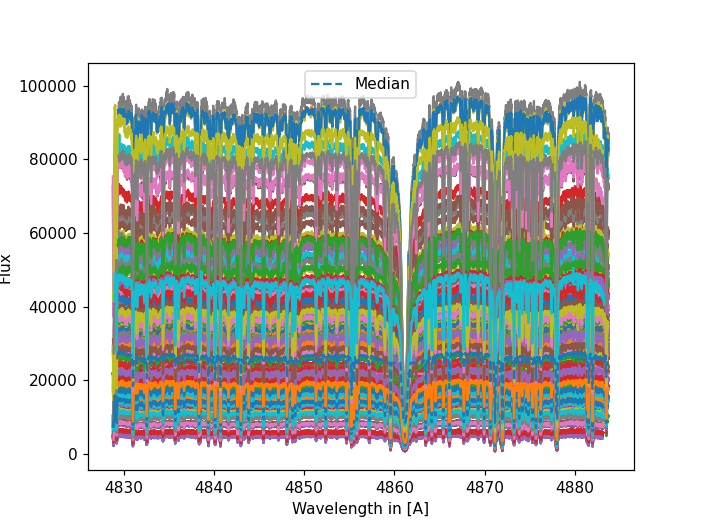

In [10]:
  
import scipy.constants as c

c_km = c.c/1000 
    
    
%matplotlib notebook
from funcs import plot_fluxes, plot_median_spectrum, interpolate_flux, get_wavelength_flux_RV, save_spectrum_as_text 

#get fit files
filelist = fits_files

#get observed wavelength, flux and eflux; extract RV and calculate corrected wavelength
wave, flux, eflux, RV, BERV, wave_corr, combined_orders = get_wavelength_flux_RV(filelist, ceres = False)

#get reference wavelength from first observation night 
wave_ref_corr = wave[0] / (1 + RV[0] / c_km) 

#interpolate flux at corrected wavelength and on the corrected wavelegnths reference
flux_interp = interpolate_flux(wave, flux, wave_ref_corr, RV, BERV)

#median flux for specific order
flux_median = np.median(flux_interp, axis=0)

#controll plots for specific order
norder = 35 
plot_fluxes(wave_corr, flux, norder) 
plot_median_spectrum(wave_ref_corr, flux_median+3000, norder)   

#save the spectrum as txt file for ZASPE
save_directory = "Spectra/" + star_name + "/" + star_name + "_RV_method.txt" 
save_spectrum_as_text(combined_orders, wave_ref_corr, flux_median, save_directory)
    

### Cross-correlation method

The cross-correlation method takes the median flux from the RV method as star templat to correlate with. It then performes combines and alignes the spectra via cross correlation to the reference template. At the moment there are some issus with the cc method why using only RV method is recommended. In principle should the RV method result in the most accurate shift to the assigned reference spectrum.

In [11]:
    
from funcs import align_spectra
from funcs import combine_spectra
from astropy.io import fits 
import matplotlib.pyplot as plt

num_orders = np.shape(fits.getdata(fits_files[0]))[1]

#template is the RV corrected version
template = flux_median 

#Specify the spectral order to combine
combined_spectra = []
for i in range(num_orders):
    combined_spectrum = combine_spectra(fits_files, i, template, blaze_corrected=True)
    combined_spectra.append(np.array(combined_spectrum))

combined_spectra = np.array(combined_spectra)

#get wavelength for plotting
spectrum = fits.getdata(fits_files[0])
flux = spectrum[1,:]
wavelength = spectrum[0,:]
blaze_corrected_flux = spectrum[3,:]

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 0 has been discarded due to significant deviation. Median value 226.28858822302732
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:48:58.641_blaze_correction.fits in order 0 has been discarded due to significant deviation. Median value 241.00118999652904
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:53:32.418_blaze_correction.fits in order 0 has been discarded due to significant deviation. Median value 233.20769809240278
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-19T03:14:31.010_blaze_correction.fits in order 0 has been discarded due to significant deviation. Median value 218.07246845964204
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-19T03:17:33.718_blaze_correction.fits in order 0 has been discarded due to significant deviation. Median value 228.

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 1 has been discarded due to significant deviation. Median value 7762.031945326016
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 2 has been discarded due to significant deviation. Median value 323.94772320197296
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:48:58.641_blaze_correction.fits in order 2 has been discarded due to significant deviation. Median value 357.197474968184
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:53:32.418_blaze_correction.fits in order 2 has been discarded due to significant deviation. Median value 340.5838830226702
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-19T03:14:31.010_blaze_correction.fits in order 2 has been discarded due to significant deviation. Median value 327.4211

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 3 has been discarded due to significant deviation. Median value 376.8058529202684
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 3 has been discarded due to significant deviation. Median value 231.7747692468676
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 3 has been discarded due to significant deviation. Median value 99.39230430468513
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 3 has been discarded due to significant deviation. Median value 12505.267702013425
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 4 has been discarded due to significant deviation. Median value 426.093

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 5 has been discarded due to significant deviation. Median value 456.8613087675293
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 5 has been discarded due to significant deviation. Median value 280.5043889955944
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 5 has been discarded due to significant deviation. Median value 122.70246026928538
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 5 has been discarded due to significant deviation. Median value 14108.450120660254
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 6 has been discarded due to significant deviation. Median value 552.80

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 7 has been discarded due to significant deviation. Median value 585.7369091304269
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-07-22T05:49:48.381_blaze_correction.fits in order 7 has been discarded due to significant deviation. Median value 17793.01636729241
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 7 has been discarded due to significant deviation. Median value 339.2815758652078
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 7 has been discarded due to significant deviation. Median value 176.12731558228842
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 7 has been discarded due to significant deviation. Median value 19053.5

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 9 has been discarded due to significant deviation. Median value 884.0958697457334
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 9 has been discarded due to significant deviation. Median value 579.5035584726511
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 9 has been discarded due to significant deviation. Median value 302.43021371247653
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 9 has been discarded due to significant deviation. Median value 31966.410669429133
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 10 has been discarded due to significant deviation. Median value 950.1

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 11 has been discarded due to significant deviation. Median value 1063.2262290014373
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 11 has been discarded due to significant deviation. Median value 736.1905207886412
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 11 has been discarded due to significant deviation. Median value 329.2641624999326
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 11 has been discarded due to significant deviation. Median value 40327.98606667526
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 12 has been discarded due to significant deviation. Median value 10

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 13 has been discarded due to significant deviation. Median value 1272.282373255569
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 13 has been discarded due to significant deviation. Median value 874.7124587585922
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 13 has been discarded due to significant deviation. Median value 375.5290869389976
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 13 has been discarded due to significant deviation. Median value 47759.6246060823
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 14 has been discarded due to significant deviation. Median value 1330

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 15 has been discarded due to significant deviation. Median value 1464.943359324573
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 15 has been discarded due to significant deviation. Median value 981.0172802622599
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 15 has been discarded due to significant deviation. Median value 437.8521285152651
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 15 has been discarded due to significant deviation. Median value 54350.36601558933
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 16 has been discarded due to significant deviation. Median value 154

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 17 has been discarded due to significant deviation. Median value 1583.4309403037416
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 17 has been discarded due to significant deviation. Median value 1045.0325420990207
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 17 has been discarded due to significant deviation. Median value 467.8709781028979
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 17 has been discarded due to significant deviation. Median value 58371.57291314124
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 18 has been discarded due to significant deviation. Median value 1

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 19 has been discarded due to significant deviation. Median value 1510.478494980013
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-07-22T05:49:48.381_blaze_correction.fits in order 19 has been discarded due to significant deviation. Median value 48364.028798977415
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 19 has been discarded due to significant deviation. Median value 1025.5382655275616
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 19 has been discarded due to significant deviation. Median value 479.709171355776
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 19 has been discarded due to significant deviation. Median value 58

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 21 has been discarded due to significant deviation. Median value 2078.946687541984
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 21 has been discarded due to significant deviation. Median value 1376.3418584474525
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 21 has been discarded due to significant deviation. Median value 617.3596681001811
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 21 has been discarded due to significant deviation. Median value 76678.48328561072
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 22 has been discarded due to significant deviation. Median value 23

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 23 has been discarded due to significant deviation. Median value 2449.4574018192616
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 23 has been discarded due to significant deviation. Median value 1538.4145657173901
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 23 has been discarded due to significant deviation. Median value 693.5893398700869
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 23 has been discarded due to significant deviation. Median value 87734.30742198968
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 24 has been discarded due to significant deviation. Median value 2

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 25 has been discarded due to significant deviation. Median value 2810.985238944013
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 25 has been discarded due to significant deviation. Median value 1715.2662027428246
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 25 has been discarded due to significant deviation. Median value 786.7513764264268
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 25 has been discarded due to significant deviation. Median value 98076.91213484344
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 26 has been discarded due to significant deviation. Median value 29

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 27 has been discarded due to significant deviation. Median value 3009.424281967692
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 27 has been discarded due to significant deviation. Median value 1881.66275700186
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 27 has been discarded due to significant deviation. Median value 872.9503470355626
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 27 has been discarded due to significant deviation. Median value 107309.77227946662
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 28 has been discarded due to significant deviation. Median value 330

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 29 has been discarded due to significant deviation. Median value 3201.7931648221042
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 29 has been discarded due to significant deviation. Median value 1975.0927177222293
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 29 has been discarded due to significant deviation. Median value 921.6335040225667
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 29 has been discarded due to significant deviation. Median value 114552.16470478676
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 30 has been discarded due to significant deviation. Median value 

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 31 has been discarded due to significant deviation. Median value 3353.630943121162
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 31 has been discarded due to significant deviation. Median value 2060.601934314398
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 31 has been discarded due to significant deviation. Median value 948.2361011687385
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 31 has been discarded due to significant deviation. Median value 121220.95008588988
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 32 has been discarded due to significant deviation. Median value 36

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 33 has been discarded due to significant deviation. Median value 3551.285881454501
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 33 has been discarded due to significant deviation. Median value 2224.985768300917
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 33 has been discarded due to significant deviation. Median value 1041.2940865835076
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 33 has been discarded due to significant deviation. Median value 130045.01670026363
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 34 has been discarded due to significant deviation. Median value 3

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 35 has been discarded due to significant deviation. Median value 3537.8188534839974
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 35 has been discarded due to significant deviation. Median value 2163.8331095365293
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 35 has been discarded due to significant deviation. Median value 974.7640821902182
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 35 has been discarded due to significant deviation. Median value 128994.87243529798
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 36 has been discarded due to significant deviation. Median value 

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 37 has been discarded due to significant deviation. Median value 3876.6212575654677
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 37 has been discarded due to significant deviation. Median value 2475.3080960892285
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 37 has been discarded due to significant deviation. Median value 1148.5225841672518
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 37 has been discarded due to significant deviation. Median value 148962.46648628495
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 38 has been discarded due to significant deviation. Median value

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 39 has been discarded due to significant deviation. Median value 3899.2475024086298
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 39 has been discarded due to significant deviation. Median value 2525.020897034995
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 39 has been discarded due to significant deviation. Median value 1158.3962948522321
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 39 has been discarded due to significant deviation. Median value 155265.95209206457
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 40 has been discarded due to significant deviation. Median value 

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 41 has been discarded due to significant deviation. Median value 4038.1432567640422
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 41 has been discarded due to significant deviation. Median value 2670.1658784675014
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 41 has been discarded due to significant deviation. Median value 1218.6325943653228
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 41 has been discarded due to significant deviation. Median value 164615.14491724575
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 42 has been discarded due to significant deviation. Median value

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 43 has been discarded due to significant deviation. Median value 4110.165264555127
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 43 has been discarded due to significant deviation. Median value 2821.207592595608
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 43 has been discarded due to significant deviation. Median value 1250.1896972548766
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 43 has been discarded due to significant deviation. Median value 172583.70924816388
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 44 has been discarded due to significant deviation. Median value 4

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 45 has been discarded due to significant deviation. Median value 4445.282742172675
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 45 has been discarded due to significant deviation. Median value 3047.5793711709366
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 45 has been discarded due to significant deviation. Median value 1362.407467030705
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 45 has been discarded due to significant deviation. Median value 193795.1267399774
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 46 has been discarded due to significant deviation. Median value 55

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 47 has been discarded due to significant deviation. Median value 4479.068890367588
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 47 has been discarded due to significant deviation. Median value 3100.4728828051
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 47 has been discarded due to significant deviation. Median value 1419.2449626212015
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 47 has been discarded due to significant deviation. Median value 194595.75244917488
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 48 has been discarded due to significant deviation. Median value 568

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 49 has been discarded due to significant deviation. Median value 4395.120522750143
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 49 has been discarded due to significant deviation. Median value 3271.36520479781
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 49 has been discarded due to significant deviation. Median value 1469.5884780224385
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 49 has been discarded due to significant deviation. Median value 204294.19440423278
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 50 has been discarded due to significant deviation. Median value 58

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 51 has been discarded due to significant deviation. Median value 4573.062052900204
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 51 has been discarded due to significant deviation. Median value 3420.5607488824016
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 51 has been discarded due to significant deviation. Median value 1539.957306026362
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 51 has been discarded due to significant deviation. Median value 210020.80163925298
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 52 has been discarded due to significant deviation. Median value 6

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 53 has been discarded due to significant deviation. Median value 4749.613699268331
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 53 has been discarded due to significant deviation. Median value 3459.438457754335
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 53 has been discarded due to significant deviation. Median value 1574.288681340516
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 53 has been discarded due to significant deviation. Median value 219488.80587339954
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 54 has been discarded due to significant deviation. Median value 62

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 55 has been discarded due to significant deviation. Median value 5392.358748935183
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 55 has been discarded due to significant deviation. Median value 3636.4865237104987
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 55 has been discarded due to significant deviation. Median value 1654.5765047316415
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 55 has been discarded due to significant deviation. Median value 228387.77418453174
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 56 has been discarded due to significant deviation. Median value 

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 57 has been discarded due to significant deviation. Median value 4887.800188271773
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 57 has been discarded due to significant deviation. Median value 3649.8016672838803
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 57 has been discarded due to significant deviation. Median value 1643.0181259279466
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 57 has been discarded due to significant deviation. Median value 226199.9444015932
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 58 has been discarded due to significant deviation. Median value 6

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 59 has been discarded due to significant deviation. Median value 5205.447695835054
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 59 has been discarded due to significant deviation. Median value 3682.8916059609683
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 59 has been discarded due to significant deviation. Median value 1669.3125083297841
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 59 has been discarded due to significant deviation. Median value 234170.88265009873
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 60 has been discarded due to significant deviation. Median value 

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 61 has been discarded due to significant deviation. Median value 5535.623433495892
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 61 has been discarded due to significant deviation. Median value 3840.9389086308965
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 61 has been discarded due to significant deviation. Median value 1754.62348653508
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 61 has been discarded due to significant deviation. Median value 243657.24747093843
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 62 has been discarded due to significant deviation. Median value 74

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 63 has been discarded due to significant deviation. Median value 5680.488448559085
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 63 has been discarded due to significant deviation. Median value 3805.4116861176462
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 63 has been discarded due to significant deviation. Median value 1718.2739666843001
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 63 has been discarded due to significant deviation. Median value 243448.41951286193
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 64 has been discarded due to significant deviation. Median value 

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 65 has been discarded due to significant deviation. Median value 5800.2548984254945
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 65 has been discarded due to significant deviation. Median value 3924.9582610998073
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 65 has been discarded due to significant deviation. Median value 1774.4215918777593
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 65 has been discarded due to significant deviation. Median value 245556.2688557572
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 66 has been discarded due to significant deviation. Median value 

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 67 has been discarded due to significant deviation. Median value 5765.783483735328
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 67 has been discarded due to significant deviation. Median value 3687.609888915359
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 67 has been discarded due to significant deviation. Median value 1663.7842802306905
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 67 has been discarded due to significant deviation. Median value 235945.89080365977
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 68 has been discarded due to significant deviation. Median value 7

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 69 has been discarded due to significant deviation. Median value 5722.427414998563
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 69 has been discarded due to significant deviation. Median value 3520.902079485768
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 69 has been discarded due to significant deviation. Median value 1627.985928718119
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 69 has been discarded due to significant deviation. Median value 226556.9776010615
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2004-10-14T23:47:27.562_blaze_correction.fits in order 70 has been discarded due to significant deviation. Median value 765

Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2005-06-21T05:41:36.873_blaze_correction.fits in order 71 has been discarded due to significant deviation. Median value 5261.435923289515
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:33:41.280_blaze_correction.fits in order 71 has been discarded due to significant deviation. Median value 3127.156132477119
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2010-06-23T05:40:52.263_blaze_correction.fits in order 71 has been discarded due to significant deviation. Median value 1449.3622731319397
Spectrum from night /home/aaron/Desktop/ZASPE/Spectra/GJ776/HARPS2011-04-24T09:34:39.067_blaze_correction.fits in order 71 has been discarded due to significant deviation. Median value 201429.33421952074


<IPython.core.display.Javascript object>


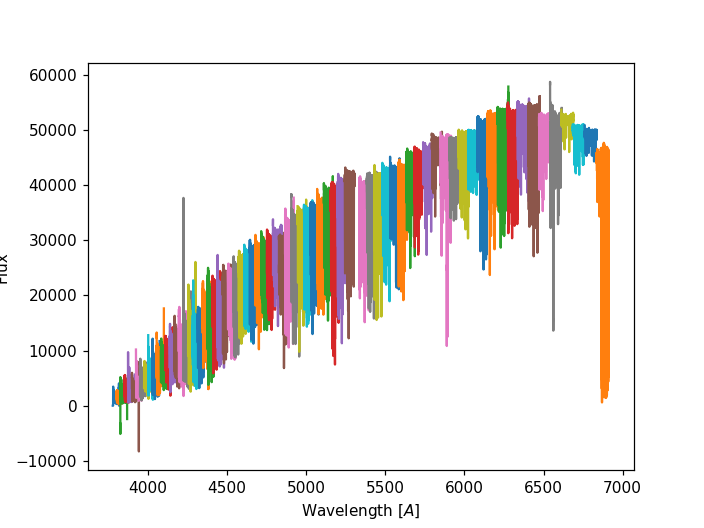

In [12]:

%matplotlib notebook 

import matplotlib.pyplot as plt 
plt.xlabel(r"Wavelength $[A]$")
plt.ylabel(r"Flux")
for i in range(len(wavelength)):
    plt.plot(combined_spectra[:,1][i], combined_spectra[:,2][i])


In [13]:

    
from funcs import store_spectrum_orders
save_dir = "Spectra/" + star_name + "/"

#Cross correlation method    
file_name = star_name + "_CCM" + ".txt"

store_spectrum_orders(combined_spectra[:,1],combined_spectra[:,2], save_dir = save_dir, file_name = file_name )

The spectrum for all orders has been stored in the file: Spectra/GJ776/GJ776_CCM.txt
